# Sesi 6 - Pandas Ep.2 (EDA with Pandas)

# Data Cleaning with Pandas

According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data

In [36]:
import numpy as np
import pandas as pd 

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [38]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [39]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [40]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [41]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [42]:
missing_values = ["n/a", "na", "--"]

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)


In [44]:
df['OWN_OCCUPIED']


0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [45]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [46]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt = cnt + 1

In [47]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


Summarizing Missing Values

In [48]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [57]:
df.isnull().values.any()

True

In [50]:
df.isnull().sum().sum()

12

# Replacing

In [51]:
# Terkadang kita ingin mengisi nilai yang hilang daripada menghapusnya
df['ST_NUM'].fillna(125, inplace = True)

In [52]:
df.loc[2, 'ST_NUM'] = 125

In [53]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace = True)


In [54]:
df.head(9)


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


# Analyzing Obesity in England

Investigate:Children are getting fatter every decade

In [58]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [59]:
data

In [60]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [61]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)


In [62]:
data_age.head()


,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [64]:
# Mengubah nama kolom 'Unnamed: 0' menjadi 'Year'
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace = True)


inplace = True modifies the existing object. Without this, Pandas will create a new objet and return tha

In [68]:
# Menghapus baris kosong yang berisi NaN
data_age.dropna(inplace = True)

In [69]:
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [67]:
data_age.set_index('Year', inplace = True)


<AxesSubplot:xlabel='Year'>

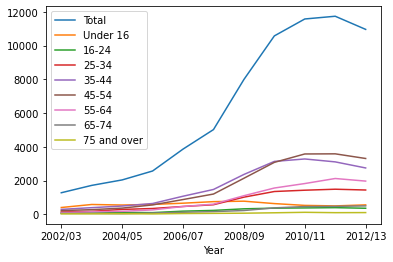

In [70]:
# Membuat plot
data_age.plot()

In [71]:
data_age_minus_total = data_age.drop('Total', axis = 1)


<AxesSubplot:xlabel='Year'>

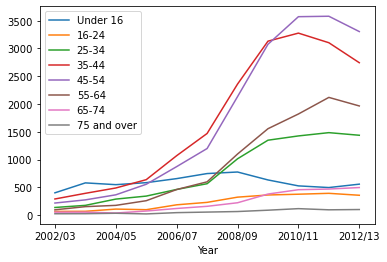

In [72]:
data_age_minus_total.plot()


<AxesSubplot:xlabel='Year'>

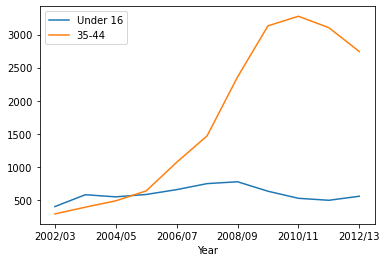

In [74]:
# Membuat plot sebagian kecil data
# Anak-anak di bawah usia 16 tahun dan orang dewasa dengan rentang usia 35-44 tahun
data_age['Under 16'].plot(label = "Under 16", legend = True)
data_age['35-44'].plot(label = "35-44", legend = True)

Dapat disimpulkan bahwa tingkat obesitas anak-anak cenderung stabil-menurun, dan jangka umur orang tua malah membengkak. It is advisable for parents to mind theirselves instead of their children

# Time Series


# Basic Time Series Manipulation


In [75]:
from datetime import datetime


In [76]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')


In [77]:
date_rng


DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [78]:
df = pd.DataFrame(date_rng, columns = ['date'])


In [79]:
df['data'] = np.random.randint(0, 100, size = (len(date_rng)))


In [80]:
df.head()

,date,data
0,2020-01-01 00:00:00,41
1,2020-01-01 01:00:00,70
2,2020-01-01 02:00:00,34
3,2020-01-01 03:00:00,92
4,2020-01-01 04:00:00,45


In [81]:
# Memanipulasi deret waktu/time series, hanya perlu memiliki date time index.
df['datetime'] = pd.to_datetime(df['date'])

In [82]:
df = df.set_index('datetime')


In [83]:
df.drop(['date'], axis = 1, inplace = True)


In [84]:
df.head()


,data
datetime,
2020-01-01 00:00:00,41
2020-01-01 01:00:00,70
2020-01-01 02:00:00,34
2020-01-01 03:00:00,92
2020-01-01 04:00:00,45


In [85]:
# Mengubah date_rng menjadi list of string dan mengubah string tersebut menjadi timestamp
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [86]:
# Mengonversi string menjadi timestamps dengan melihat format
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format = True)
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [87]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-3-2020']


In [88]:
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]


In [89]:
timestamp_date_rng_2


[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [90]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns = ['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [91]:
df[df.index.day == 2]


,data
datetime,
2020-01-02 00:00:00,78
2020-01-02 01:00:00,29
2020-01-02 02:00:00,48
2020-01-02 03:00:00,58
2020-01-02 04:00:00,7
2020-01-02 05:00:00,33
2020-01-02 06:00:00,6
2020-01-02 07:00:00,48
2020-01-02 08:00:00,22


In [92]:
df.loc['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,62
2020-01-03 01:00:00,22
2020-01-03 02:00:00,62
2020-01-03 03:00:00,15
2020-01-03 04:00:00,36
2020-01-03 05:00:00,34
2020-01-03 06:00:00,54
2020-01-03 07:00:00,92
2020-01-03 08:00:00,8


In [93]:
df['2020-01-04': '2020-01-06']


,data
datetime,
2020-01-04 00:00:00,39
2020-01-04 01:00:00,51
2020-01-04 02:00:00,99
2020-01-04 03:00:00,68
2020-01-04 04:00:00,87
...,...
2020-01-06 19:00:00,50
2020-01-06 20:00:00,77
2020-01-06 21:00:00,35


In [94]:
# Kita dapat mengambil min, max, average, sum dll.
# Mengambil mean pada data frekuensi harian (Day/D).
df.resample('D').mean()

,data
datetime,
2020-01-01,51.625000
2020-01-02,41.791667
2020-01-03,33.666667
2020-01-04,50.666667
2020-01-05,58.625000
2020-01-06,46.250000
2020-01-07,52.208333
2020-01-08,84.000000


In [95]:
# Membuat kolom baru menghitung rolling sum selama periode 3 window
df['rolling_sum'] = df.rolling(3).sum()

In [96]:
df.head()


,data,rolling_sum
datetime,,
2020-01-01 00:00:00,41,NaN
2020-01-01 01:00:00,70,NaN
2020-01-01 02:00:00,34,145.0
2020-01-01 03:00:00,92,196.0
2020-01-01 04:00:00,45,171.0


In [99]:
# Menambahkan kolom baru guna mengisi field yang kosong pada kolom rolling_sum
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method = 'backfill')

In [100]:
df.head()


,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,41,NaN,145.0
2020-01-01 01:00:00,70,NaN,145.0
2020-01-01 02:00:00,34,145.0,145.0
2020-01-01 03:00:00,92,196.0,196.0
2020-01-01 04:00:00,45,171.0,171.0


# Time Series on Dataset


In [101]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [102]:
opsd_daily.head(3)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [103]:
opsd_daily.tail(3)


,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [104]:
# Mengubah kolom Date menjadi indeks DataFrame
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [105]:
opsd_daily.index


Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [106]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col = 0, parse_dates = True)


In [107]:
opsd_daily.head()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [108]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [109]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [110]:
opsd_daily.loc['2017-08-10']


Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [111]:
opsd_daily.loc['2014-01-20':'2014-01-22']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [112]:
opsd_daily.loc['2012-02']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


<AxesSubplot:xlabel='Date'>

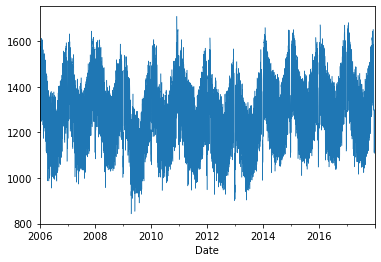

In [113]:
# Membuat line plot dari time series konsumsi listrik harian di Jerman
opsd_daily['Consumption'].plot(linewidth = 0.5)

<AxesSubplot:xlabel='Date'>

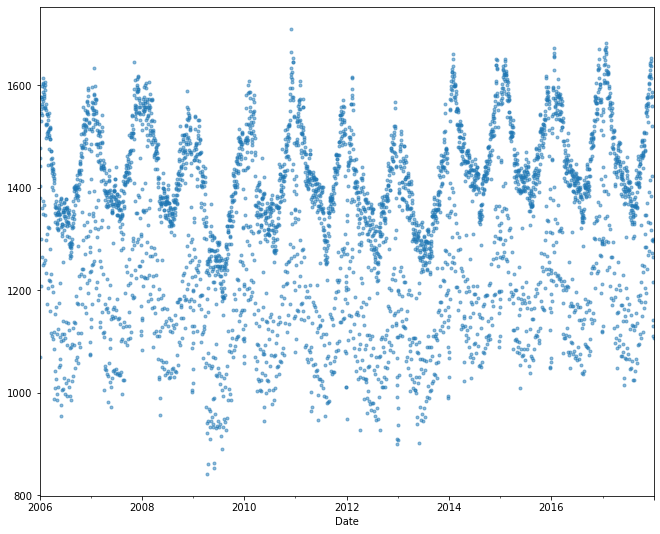

In [114]:
# Membuat plot data sebagai titik-titik dan time series dari Matahari dan Angin
opsd_daily['Consumption'].plot(marker = '.', alpha = 0.5, linestyle = 'None', figsize = (11, 9))

<AxesSubplot:xlabel='Date'>

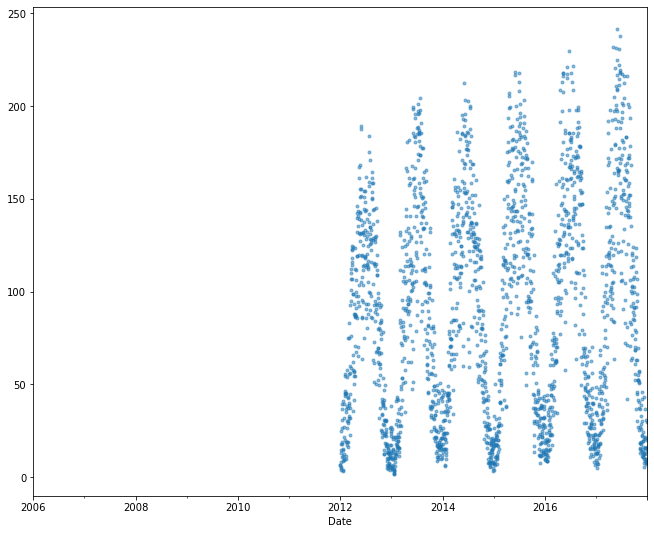

In [115]:
opsd_daily['Solar'].plot(marker = '.', alpha = 0.5, linestyle = 'None', figsize = (11, 9))


<AxesSubplot:xlabel='Date'>

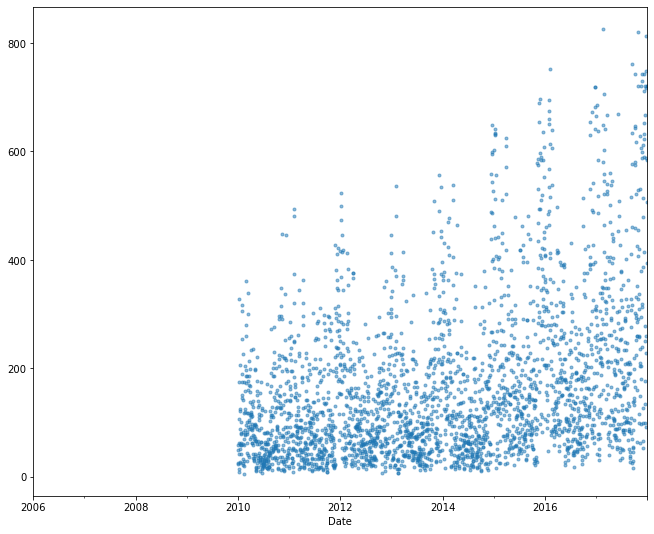

In [116]:
opsd_daily['Wind'].plot(marker = '.', alpha = 0.5, linestyle = 'None', figsize = (11, 9))


Text(0, 0.5, 'Daily Consumption (GWh)')

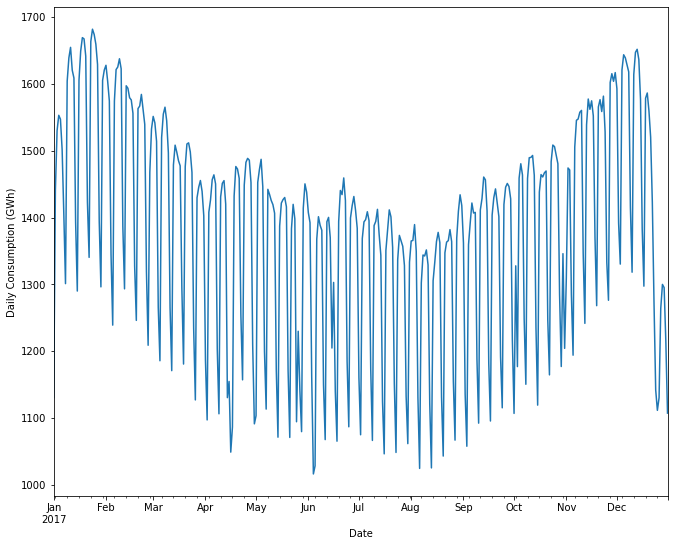

In [117]:
# Membuat plot deret waktu dalam satu tahun untuk menyelidiki lebih lanjut
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize = (11, 9))
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

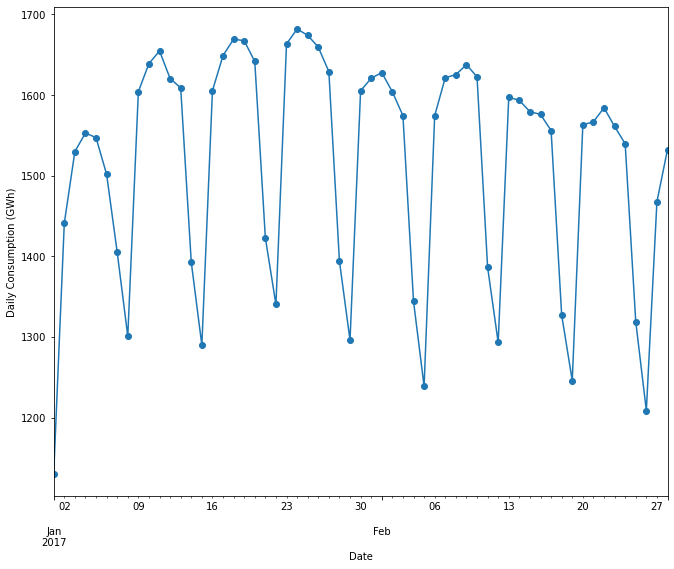

In [118]:
# Perbesar lebih jauh untuk melihat bulan Januari dan Februari
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker = 'o', linestyle = '-', figsize = (11, 9))
ax.set_ylabel('Daily Consumption (GWh)')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

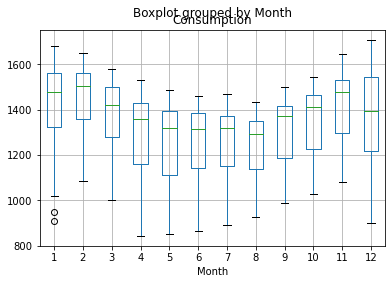

In [119]:
# Menjelajahi lebih jauh dari seasonality data dengan fungsi box plots guna mengelompokkan data berdasarkan periode waktu yang berbeda dan menampilkan distribusi untuk setiap kelompok.
# Dimulai dengan mengelompokkan data berdasarkan bulan, untuk memvisualisasikan yearly seasonality.
opsd_daily.boxplot(column = ['Consumption'], by = 'Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

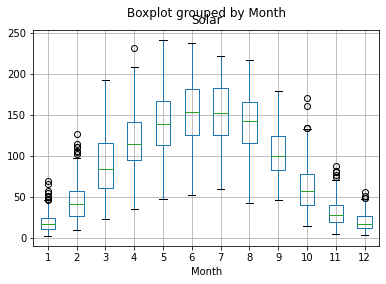

In [121]:
opsd_daily.boxplot(column = ['Solar'], by = 'Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

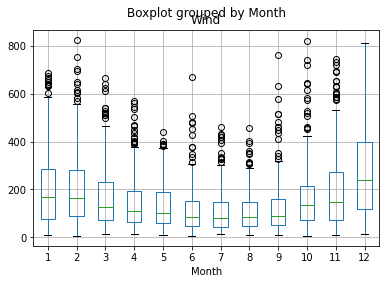

In [122]:
opsd_daily.boxplot(column = ['Wind'], by = 'Month')


Berdasarkan box plots berikut, dapat dikonfirmasi yearly seasonlaity yang dapat dilihat memberikan kesimpulan sebagai berikut:

Meskipun konsumsi listrik umumnya lebih tinggi di musim dingin dan lebih rendah di musim panas, median, dan dua kuartil lebih rendah lebih rendah pada bulan Desember dan Januari dibandingkan dengan November dan Februari, kemungkinan karena bisnis tutup selama liburan. Kita melihat ini dalam rangkaian waktu untuk tahun 2017, dan box plot menegaskan bahwa ini adalah pola yang konsisten selama bertahun-tahun.
Sementara produksi tenaga surya dan angin sama-sama menunjukkan yearly seasonality, distribusi tenaga angin memiliki lebih banyak outliers, yang mencerminkan efek kecepatan angin ekstrem sesekali yang terkait dengan badai dan kondisi cuaca sementara lainnya.

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

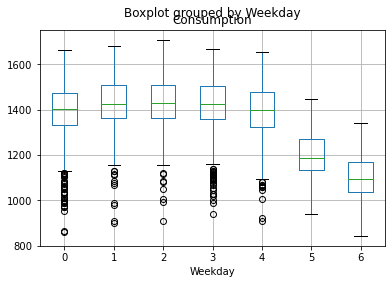

In [123]:
# Mengelompokkan rangkaian waktu konsumsi listrik berdasarkan hari dalam seminggu, untuk menjelajahi weekly seasonality
opsd_daily.boxplot(column = ['Consumption'], by = 'Weekday')

In [124]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [125]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<AxesSubplot:xlabel='Date'>

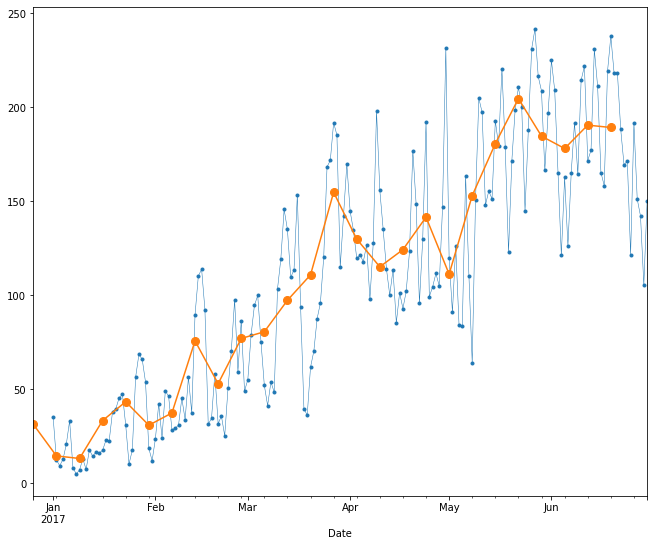

In [126]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

Dapat dilihat bahwa deret waktu rata-rata mingguan lebih halus dibanding deret waktu harian karena variabilitas frekuensi yang lebih tinggi telah dirata-ratakan dalam resampling.